<a href="https://colab.research.google.com/github/priti378/synthetic_seismogram1/blob/main/synthetic_seismogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning into 'synthetic_seismogram1'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt



<ipython-input-3-216edc694b83>:44: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(reflectivity_depth_series, linefmt='-', basefmt=" ", use_line_collection=True)


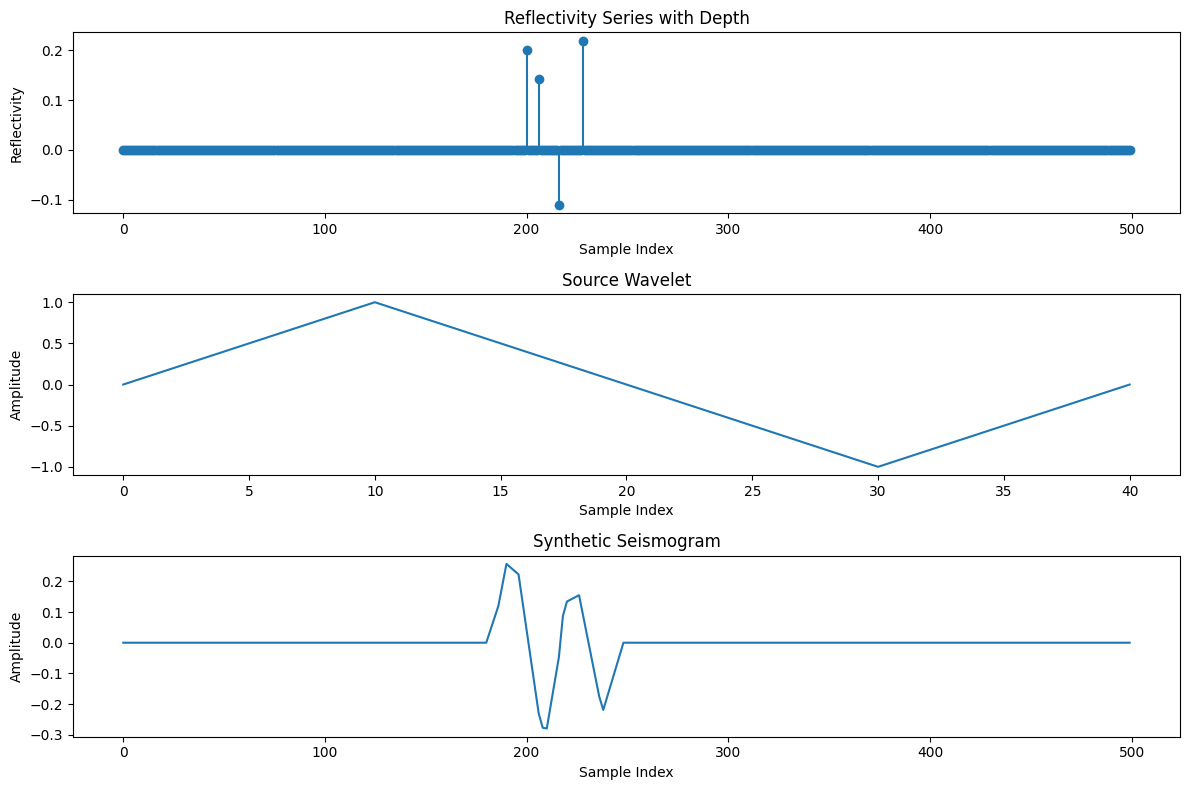

In [3]:

velocities = [1000, 1500, 2000, 1600, 2500]
thicknesses = [200, 10, 20, 20]

# Calculate reflectivity series
def calculate_reflectivity(velocities):
    reflectivity = []
    for i in range(1, len(velocities)):
        r = (velocities[i] - velocities[i-1]) / (velocities[i] + velocities[i-1])
        reflectivity.append(r)
    return reflectivity

reflectivity_series = calculate_reflectivity(velocities)

# Generate reflectivity series with depth
def generate_reflectivity_series_with_depth(reflectivity_series, thicknesses, dt, total_samples):
    reflectivity_depth_series = np.zeros(total_samples)
    current_depth = 0
    for i, thickness in enumerate(thicknesses):
        depth_samples = int(thickness / (velocities[i] * dt))
        current_depth += depth_samples
        reflectivity_depth_series[current_depth] = reflectivity_series[i]
    return reflectivity_depth_series

# Time sampling
dt = 0.001  # time sample interval in seconds
total_time = sum(thicknesses) * 2 / min(velocities)  # rough estimate of total travel time
total_samples = int(total_time / dt)

# Generate reflectivity series with depth
reflectivity_depth_series = generate_reflectivity_series_with_depth(reflectivity_series, thicknesses, dt, total_samples)

# Define the source wavelet
source_wavelet = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1,
                  0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4,
                  -0.3, -0.2, -0.1, 0.0]

# Convolve the reflectivity series with the source wavelet
synthetic_seismogram = np.convolve(reflectivity_depth_series, source_wavelet, mode='same')

# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.stem(reflectivity_depth_series, linefmt='-', basefmt=" ", use_line_collection=True)
plt.title('Reflectivity Series with Depth')
plt.xlabel('Sample Index')
plt.ylabel('Reflectivity')

plt.subplot(3, 1, 2)
plt.plot(source_wavelet)
plt.title('Source Wavelet')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(synthetic_seismogram)
plt.title('Synthetic Seismogram')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()
